In [1]:
from __future__ import print_function

import calendar
import csv
import collections
import matplotlib.pyplot as plt
import pprint as pp
import numpy as np
import scipy as sp
import scipy.stats

In [2]:
# For more info please visit
# https://www.kaggle.com/open-source-sports/mens-professional-basketball/version/2#basketball_master.csv
dataset_file = 'data/mens_profeccional_basketball/basketball_master.csv'
month_names = [calendar.month_name[i + 1] for i in xrange(12)]

In [3]:
with open(dataset_file) as fin:
    reader = csv.DictReader(fin)
    players = [player for player in reader]

In [4]:
# Prints a sample player
pp.pprint(players[1])

{'bioID': 'abdulka01',
 'birthCity': 'New York',
 'birthCountry': 'USA',
 'birthDate': '1947-04-16',
 'birthState': 'NY',
 'college': 'UCLA',
 'collegeOther': '',
 'deathDate': '0000-00-00',
 'firstName': 'Kareem',
 'firstseason': '0',
 'fullGivenName': 'Ferdinand Lewis Alcindor, Jr.',
 'height': '85.00',
 'highSchool': 'Power Memorial',
 'hsCity': 'New York',
 'hsCountry': 'USA',
 'hsState': 'NY',
 'lastName': 'Abdul-Jabbar',
 'lastseason': '0',
 'middleName': '',
 'nameGiven': '',
 'nameNick': 'Lew, Cap',
 'nameSuffix': '',
 'pos': 'C',
 'race': 'B',
 'useFirst': 'Kareem',
 'weight': '225'}


In [5]:
# Removes player with invalid Birth Date
players = [player for player in players if (player['birthDate'] and player['birthDate'] != '0000-00-00')]

In [14]:
def GetBirthMonths(players):
    birth_dates = [player['birthDate'] for player in players] 
    birth_months = [birth_date.split('-')[1] for birth_date in birth_dates ]
    month_frequency = collections.Counter(birth_months)
    del month_frequency['00']  # '00' is for unknow birth dates
    months, frequencies = zip(*sorted(month_frequency.items()))
    print(months)
    return months, frequencies
_, frequencies = GetBirthMonths(players)

('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12')


In [25]:
def Report(frequencies):
    plt.bar(range(12), frequencies)
    plt.ylim(0, 450)
    plt.xticks(range(12), month_names, rotation='vertical')
    plt.show()
    print(frequencies)
    print('Number of players:', sum(frequencies))
    print('Mean: ', np.mean(frequencies))
    print('Min: %d\tMedian: %d\tMax: %d' %(
        np.min(frequencies), np.median(frequencies), np.max(frequencies)))
    print('Variance: %0.2f=%0.2f^2' %(np.var(frequency), np.std(frequencies)))
    print('Chi Squere Test:', sp.stats.chisquare(frequency))

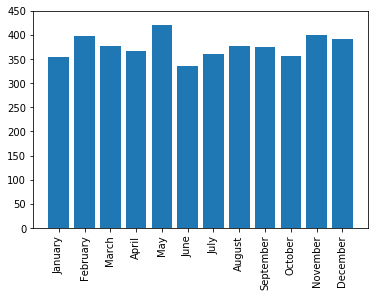

(355, 397, 376, 367, 421, 335, 360, 376, 375, 356, 399, 391)
Number of players: 4508
Mean:  375.6666666666667
Min: 335	Median: 375	Max: 421
Variance: 506.56=22.51^2
Chi Squere Test: Power_divergenceResult(statistic=16.181011535048803, pvalue=0.13454281820888378)


In [26]:
Report(frequency)

In [27]:
# Keeps only USA Players
players_us_only = [player for player in players if player['birthCountry'] == 'USA']

('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12')


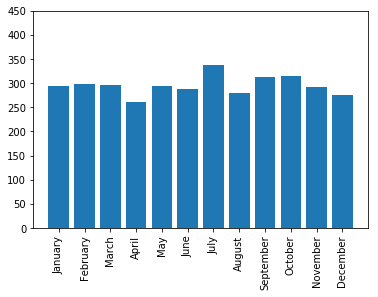

(293, 299, 296, 260, 293, 288, 337, 280, 312, 315, 291, 275)
Number of players: 3539
Mean:  294.9166666666667
Min: 260	Median: 293	Max: 337
Variance: 506.56=19.13^2
Chi Squere Test: Power_divergenceResult(statistic=16.181011535048803, pvalue=0.13454281820888378)


In [28]:
_, frequencies = GetBirthMonths(players_us_only)
Report(frequencies)